## other idea
remove duplicates using running time 
    -> problem because same movies have 1 minute difference in running time in the two data sets
try to use anoter dataset than basics that has things in common with our dataset for removal of duplicates

### Ideal
finding mapping between movie id

data set:
https://datasets.imdbws.com/

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import json
import holoviews as hv
from holoviews import opts
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
import ast

In [130]:
#Load data
cleaned_data = pd.read_csv('data/cleaned_data.csv')
inflation = pd.read_csv('data/inflation.csv')
cleaned_data['Movie genres'] = cleaned_data['Movie genres'].apply(ast.literal_eval)
cleaned_data['Movie countries'] = cleaned_data['Movie countries'].apply(ast.literal_eval)

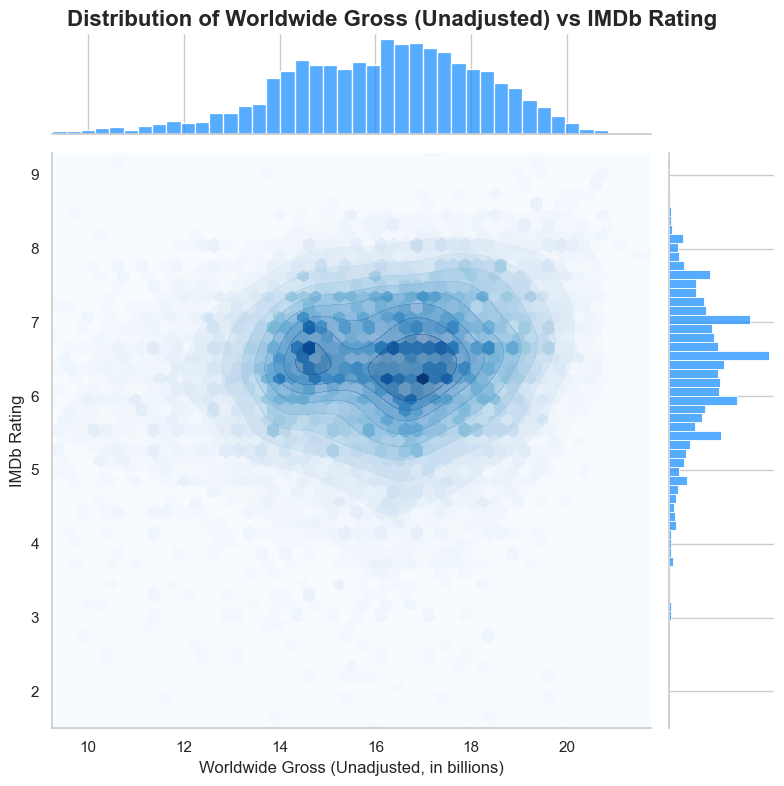

In [131]:
# Apply a log transformation (adding 1 to avoid log(0)) on the 'Movie box office revenue' column
# and store the result in a new column 'log_revenue_unjusted'
cleaned_data['Log_Revenue_unadjusted'] = np.log1p(cleaned_data['Movie box office revenue'])

# Drop rows where 'Log_Revenue_unadjusted' contains NaN values to avoid missing data in the plot
cleaned_data.drop(cleaned_data[cleaned_data['Log_Revenue_unadjusted'].isnull()].index, inplace=True)

# Set the Seaborn theme style to white grid and use a muted color palette
sns.set_theme(style="whitegrid", palette="muted")

# Create a joint plot with Seaborn, with a hexbin plot as the main part of the chart
g = sns.jointplot(data=cleaned_data, x='Log_Revenue_unadjusted', y='averageRating', kind="hex", cmap="Blues", height=8, gridsize=50, marginal_kws=dict(color="dodgerblue"))

# Overlay a density contour plot in the center area of the joint plot to show distribution contours
sns.kdeplot(data=cleaned_data, x='Log_Revenue_unadjusted', y='averageRating', cmap="Blues", fill=True, alpha=0.4, ax=g.ax_joint)

# Set the margins of the chart to fill the light blue background
g.ax_joint.margins(0)  # 移除四周的边距
g.ax_joint.set_xlim(cleaned_data['Log_Revenue_unadjusted'].min(), cleaned_data['Log_Revenue_unadjusted'].max())
g.ax_joint.set_ylim(cleaned_data['averageRating'].min(), cleaned_data['averageRating'].max())

# Set the title and labels of the plot and adjust the plot
g.fig.suptitle("Distribution of Worldwide Gross (Unadjusted) vs IMDb Rating", fontsize=16, weight='bold', ha='center')
g.set_axis_labels("Worldwide Gross (Unadjusted, in billions)", "IMDb Rating", fontsize=12)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.show()

In [132]:
#Perform an Ordinary Least Squares (OLS) regression using the statsmodels library. 
model_unadjusted = smf.ols(formula='Log_Revenue_unadjusted ~ averageRating', data=cleaned_data).fit(cov_type='HC2')
print(model_unadjusted.summary())

                              OLS Regression Results                              
Dep. Variable:     Log_Revenue_unadjusted   R-squared:                       0.024
Model:                                OLS   Adj. R-squared:                  0.023
Method:                     Least Squares   F-statistic:                     165.0
Date:                    Fri, 15 Nov 2024   Prob (F-statistic):           2.30e-37
Time:                            11:37:06   Log-Likelihood:                -15996.
No. Observations:                    7440   AIC:                         3.200e+04
Df Residuals:                        7438   BIC:                         3.201e+04
Df Model:                               1                                         
Covariance Type:                      HC2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

In [133]:
# Merge the inflation data with cleaned_data based on matching 'Year' and 'Movie release year' columns
cleaned_data = pd.merge(inflation, cleaned_data, left_on='Year', right_on='Movie release year', how='right').drop(columns=['CPI'])

# Calculate the adjusted revenue by multiplying 'Movie box office revenue' by the inflation 'rate'
cleaned_data['Adjusted_Revenue'] = cleaned_data['Movie box office revenue']*cleaned_data['rate']

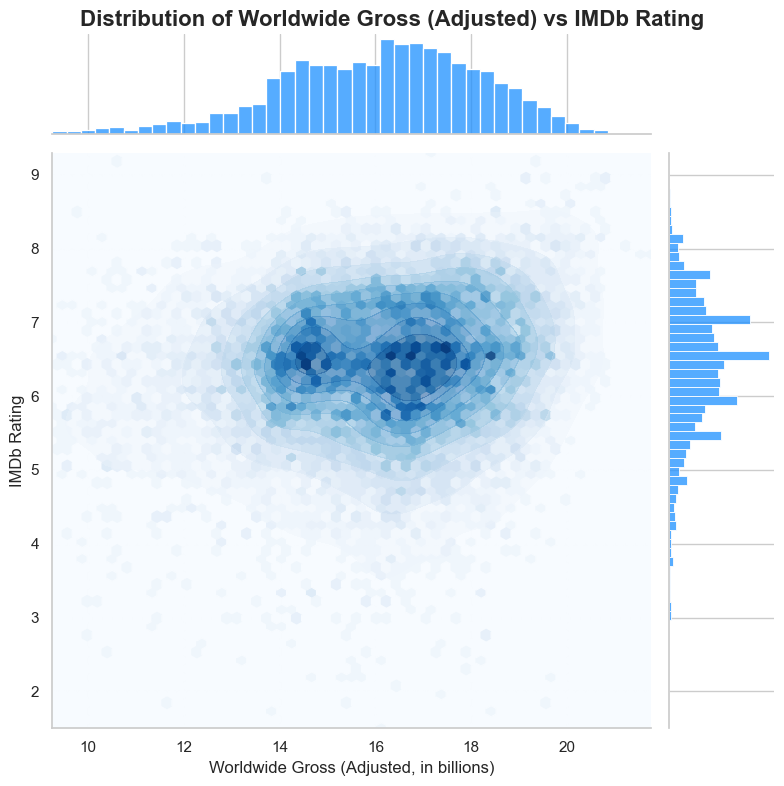

In [134]:
#Display the Adjusted World Gross vs. IMDb Rating plot with the same method when displaying Uadjusted World Gross vs. IMDb Rating plot
cleaned_data['Log_Revenue'] = np.log1p(cleaned_data['Movie box office revenue'])
cleaned_data.drop(cleaned_data[cleaned_data['Log_Revenue'].isnull()].index, inplace=True)
sns.set_theme(style="whitegrid", palette="muted")
g = sns.jointplot(data=cleaned_data, x='Log_Revenue', y='averageRating', kind="hex", cmap="Blues", height=8,gridsize=60, marginal_kws=dict(color="dodgerblue"))
sns.kdeplot(data=cleaned_data, x='Log_Revenue', y='averageRating', cmap="Blues", fill=True, alpha=0.4, ax=g.ax_joint)
g.ax_joint.margins(0) 
g.ax_joint.set_xlim(cleaned_data['Log_Revenue'].min(), cleaned_data['Log_Revenue'].max())
g.ax_joint.set_ylim(cleaned_data['averageRating'].min(), cleaned_data['averageRating'].max())
g.fig.suptitle("Distribution of Worldwide Gross (Adjusted) vs IMDb Rating", fontsize=16, weight='bold', ha='center')
g.set_axis_labels("Worldwide Gross (Adjusted, in billions)", "IMDb Rating", fontsize=12)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.show()

In [135]:
#Perform an Ordinary Least Squares (OLS) regression using the statsmodels library. 
model = smf.ols(formula='Log_Revenue ~ averageRating', data=cleaned_data).fit(cov_type='HC2')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Log_Revenue   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     165.0
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.30e-37
Time:                        11:37:20   Log-Likelihood:                -15996.
No. Observations:                7440   AIC:                         3.200e+04
Df Residuals:                    7438   BIC:                         3.201e+04
Df Model:                           1                                         
Covariance Type:                  HC2                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.9543      0.169     82.658

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
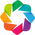

:Overlay
   .Scatter.I                    :Scatter   [averageRating]   (Log_Revenue)
   .Curve.Regression_Line        :Curve   [x]   (y)
   .Curve.Plus_1_Std_Dev         :Curve   [x]   (y)
   .Curve.Hyphen_minus_1_Std_Dev :Curve   [x]   (y)

In [136]:
hv.extension('bokeh')  # Load the 'bokeh' extension for plotting
# Calculate the coefficients, predictions, and standard deviation
coefficients = model.params
predictions = model.predict()
std_dev = np.std(predictions - cleaned_data['Log_Revenue'])

# Create the plot with improved style and readability
scatter = hv.Scatter(cleaned_data, 'averageRating', 'Log_Revenue').opts(
    color='#3498DB', size=7, alpha=0.5, tools=['hover'], xlabel='Average Rating', ylabel='Log of Movie Box Office Revenue'
)

# Regression line and Standard Deviation lines
regression_line = hv.Curve((cleaned_data['averageRating'], predictions), label='Regression Line').opts(color='orange', line_width=2)
std_dev_line_upper = hv.Curve((cleaned_data['averageRating'], predictions + std_dev), label='+1 Std Dev').opts(color='green', line_dash='dashed', line_width=2)
std_dev_line_lower = hv.Curve((cleaned_data['averageRating'], predictions - std_dev), label='-1 Std Dev').opts(color='red', line_dash='dashed', line_width=2)

# Integrate plots
layout = (scatter * regression_line * std_dev_line_upper * std_dev_line_lower).opts(
    title='Linear Regression of Log Box Office Revenue on Average Rating',
    width=800, height=500, legend_position='top_left'
)

layout


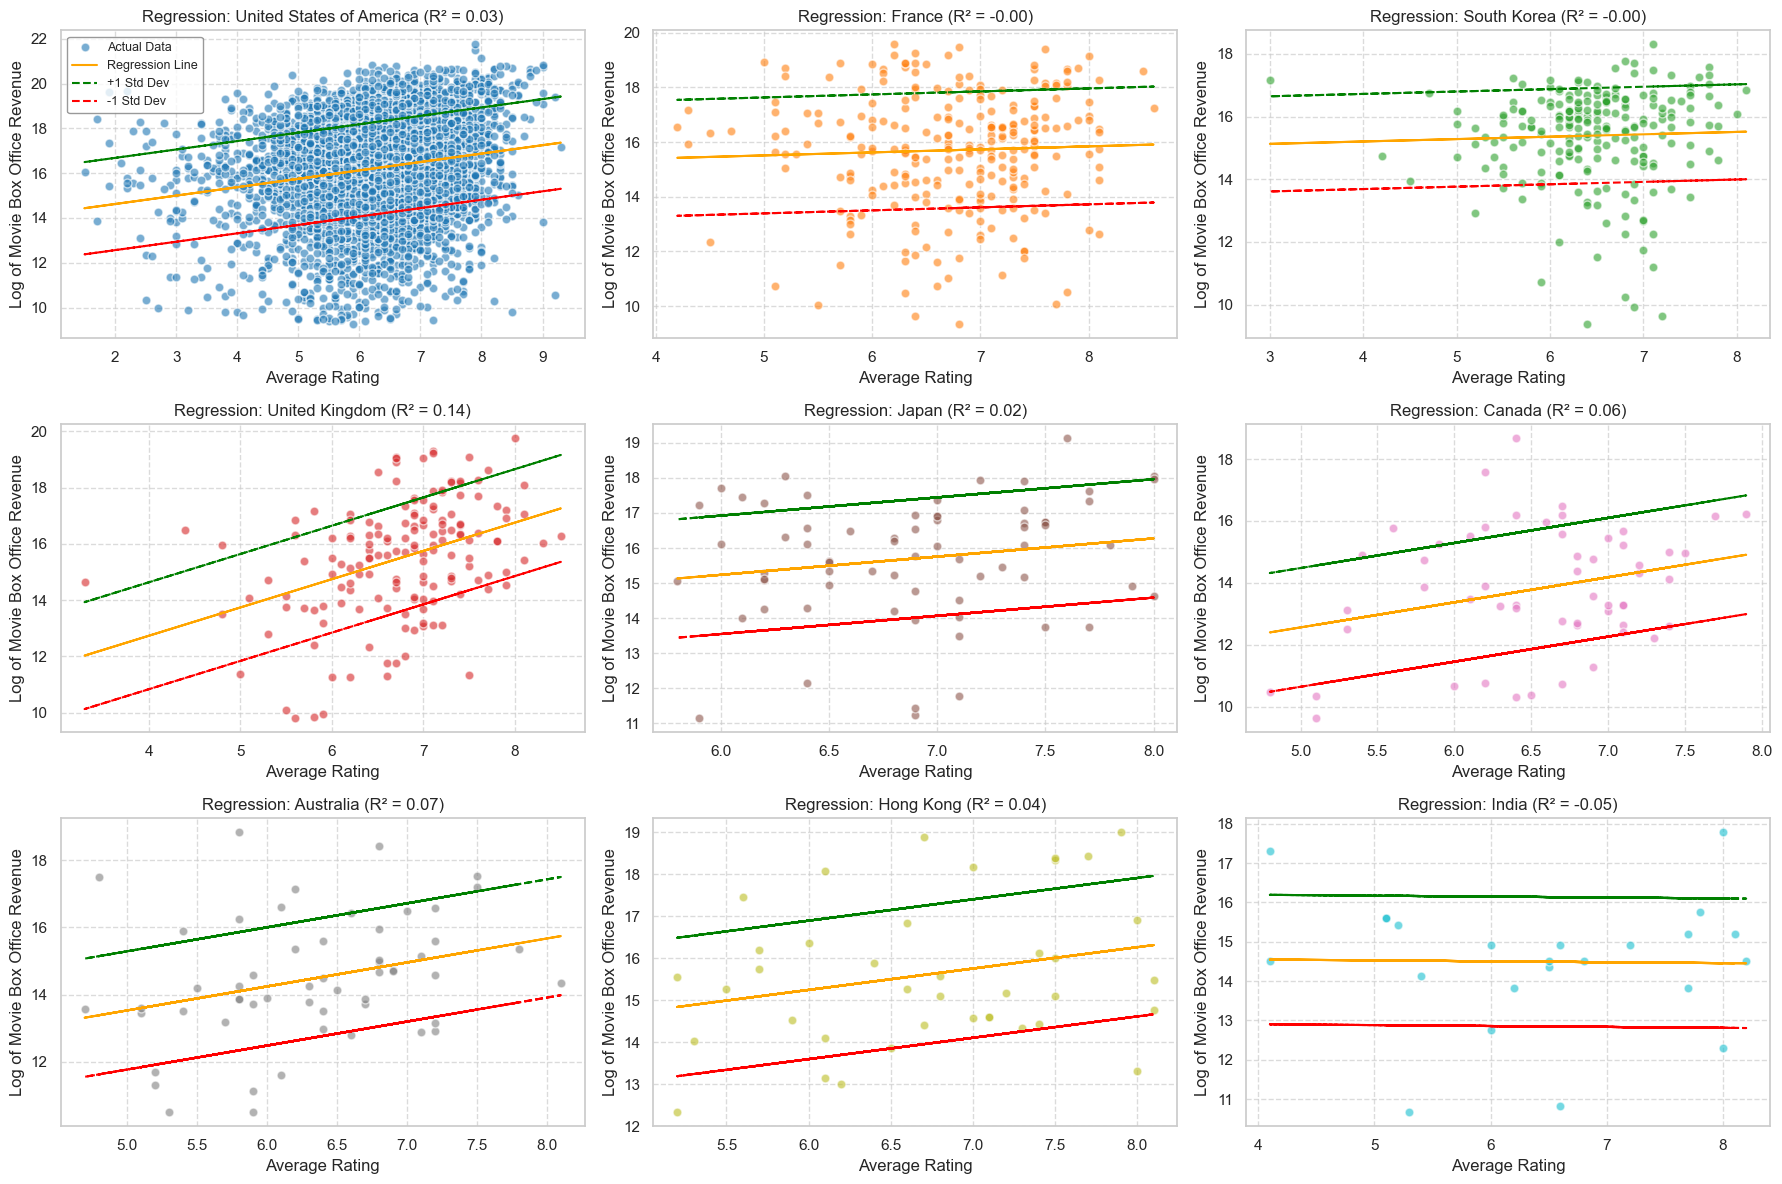

In [137]:
selected_countries = cleaned_data['Primary Country'].value_counts().sort_values(ascending=False).head(9).index.tolist()
subset = cleaned_data[cleaned_data['Primary Country'].isin(selected_countries)]
colors_countries = plt.cm.tab10(np.linspace(0, 1, len(selected_countries)))

plt.figure(figsize=(18, 12))
for i, country in enumerate(selected_countries, 1):
    plt.subplot(3, 3, i)  
    country_data = subset[subset['Primary Country'] == country]
    model_countries = smf.ols(formula='Log_Revenue ~ averageRating', data=country_data).fit(cov_type='HC2')
    coefficients_countries = model_countries.params
    predictions_countries = model_countries.predict()
    r2_score_countries = model_countries.rsquared_adj
    std_dev_countries = np.std(predictions_countries - country_data['Log_Revenue'])
    plt.scatter(country_data['averageRating'], country_data['Log_Revenue'], color=colors_countries[i - 1], alpha=0.6, s=40, edgecolor='white', label='Actual Data')
    plt.plot(country_data['averageRating'], predictions_countries, color='orange', label='Regression Line')
    plt.plot(country_data['averageRating'], predictions_countries + std_dev_countries, color='green', linestyle='--', label='+1 Std Dev')
    plt.plot(country_data['averageRating'], predictions_countries - std_dev_countries, color='red', linestyle='--', label='-1 Std Dev')
    plt.xlabel('Average Rating')
    plt.ylabel('Log of Movie Box Office Revenue')
    plt.title(f'Regression: {country} (R² = {r2_score_countries:.2f})')
    plt.grid(True, linestyle='--', alpha=0.7)
    if i == 1:  
        plt.legend(fontsize=9, loc='upper left', frameon=True, framealpha=0.8, edgecolor='gray')



plt.tight_layout()
plt.show()

e:\anaconda3\envs\ada\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning:

invalid value encountered in divide

e:\anaconda3\envs\ada\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

e:\anaconda3\envs\ada\Lib\site-packages\statsmodels\regression\linear_model.py:2003: RuntimeWarning:

divide by zero encountered in divide



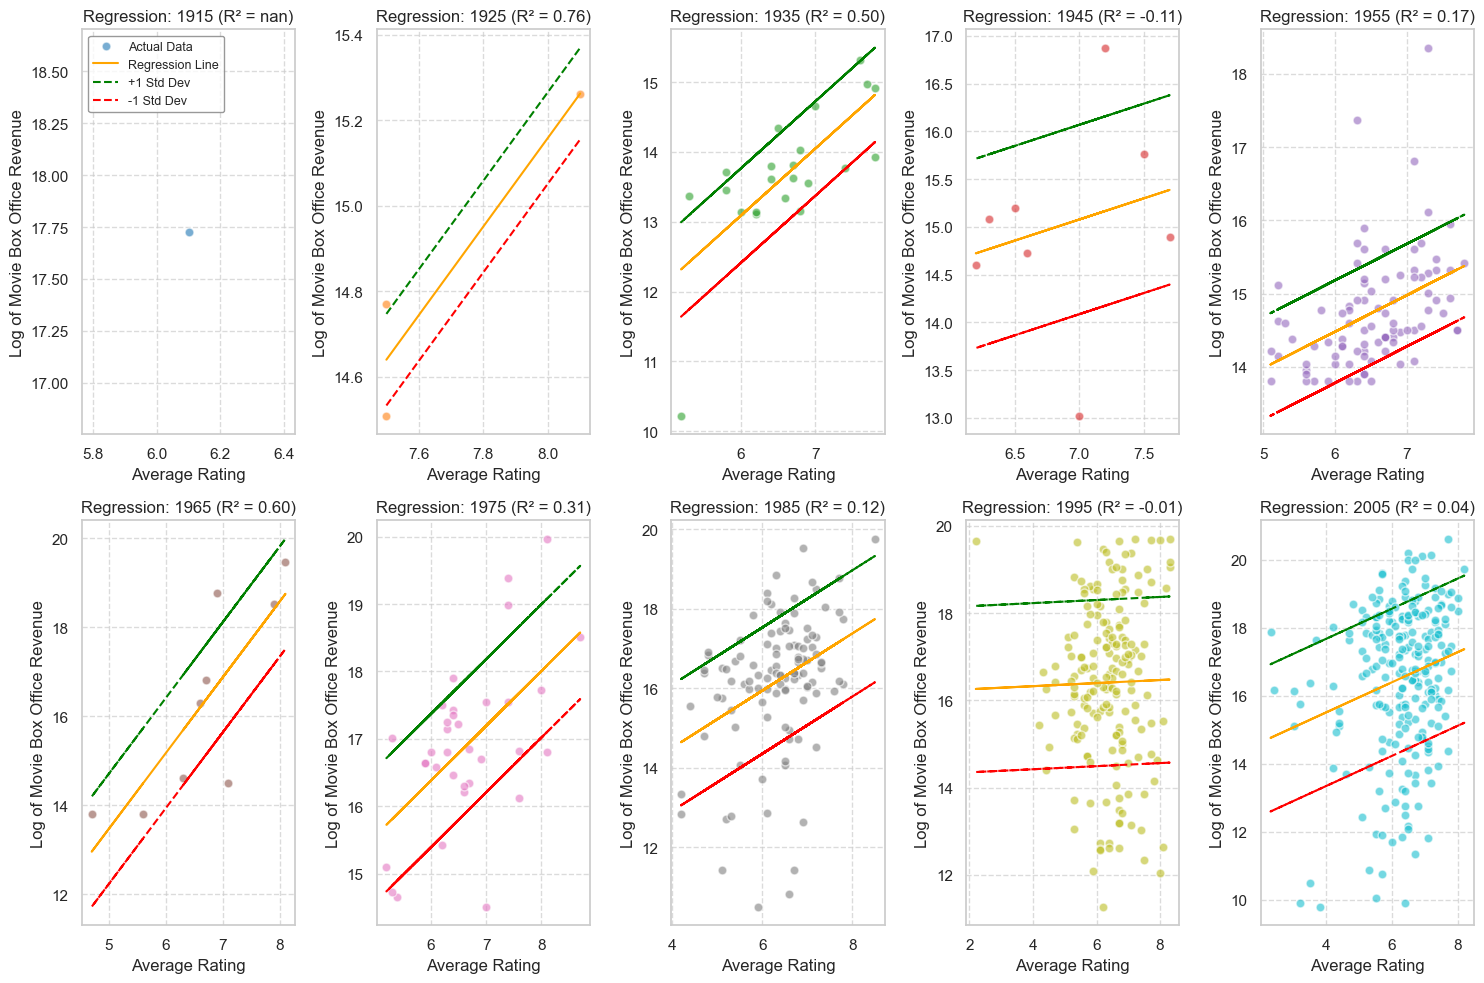

In [138]:
cleaned_data['Year'].max()
selected_years = range(1915,2015,10)
subset = cleaned_data[cleaned_data['Year'].isin(selected_years)]
colors_years = plt.cm.tab10(np.linspace(0, 1, len(selected_years)))
plt.figure(figsize=(15, 10))

for i, year in enumerate(selected_years, 1):
    plt.subplot(2, 5, i)  
    year_data = subset[subset['Year'] == year]
    model_years = smf.ols(formula='Log_Revenue ~ averageRating', data=year_data).fit(cov_type='HC2')
    coefficients_years = model_years.params
    predictions_years = model_years.predict()
    r2_score_years = model_years.rsquared_adj
    std_dev_years = np.std(predictions_years - year_data['Log_Revenue'])
    plt.scatter(year_data['averageRating'], year_data['Log_Revenue'], color=colors_years[i - 1], alpha=0.6, s=40, edgecolor='white', label='Actual Data')
    plt.plot(year_data['averageRating'], predictions_years, color='orange', label='Regression Line')
    plt.plot(year_data['averageRating'], predictions_years + std_dev_years, color='green', linestyle='--', label='+1 Std Dev')
    plt.plot(year_data['averageRating'], predictions_years - std_dev_years, color='red', linestyle='--', label='-1 Std Dev')
    plt.xlabel('Average Rating')
    plt.ylabel('Log of Movie Box Office Revenue')
    plt.title(f'Regression: {year} (R² = {r2_score_years:.2f})')
    plt.grid(True, linestyle='--', alpha=0.7)
    if i == 1:
        plt.legend(fontsize=9, loc='upper left', frameon=True, framealpha=0.8, edgecolor='gray')

plt.tight_layout()
plt.show()

In [139]:
residuals = cleaned_data['Log_Revenue'] - predictions
outliers = cleaned_data[np.abs(residuals) > std_dev]['Log_Revenue']
print(outliers.count())
higher = cleaned_data[residuals > std_dev].copy()
lower = cleaned_data[residuals < -std_dev].copy()
print('length of higher:',len(higher),'length of lower:',len(lower))

2371
length of higher: 1231 length of lower: 1140


In [141]:
# Calculate residuals between actual and predicted values
residuals = cleaned_data['Log_Revenue'] - predictions

# Identify outliers where the absolute residual is greater than the standard deviation
outliers = cleaned_data[np.abs(residuals) > std_dev]['Log_Revenue']
print(outliers.count())

# Separate data into high residuals (above +std_dev) and low residuals (below -std_dev)
higher = cleaned_data[residuals > std_dev].copy()
lower = cleaned_data[residuals < -std_dev].copy()
print('length of higher:', len(higher), 'length of lower:', len(lower))

# Extract the first, second, and third genres for each movie in 'higher'
higher.loc[:, 'First genre'] = higher['Movie genres'].apply(lambda x: x[0] if len(x) > 0 else None)  # First genre
higher.loc[:, 'Second genre'] = higher['Movie genres'].apply(lambda x: x[1] if len(x) > 1 else None)  # Second genre, if available
higher.loc[:, 'Third genre'] = higher['Movie genres'].apply(lambda x: x[2] if len(x) > 2 else None)  # Third genre, if available

# Extract the first, second, and third genres for each movie in 'lower'
lower.loc[:, 'First genre'] = lower['Movie genres'].apply(lambda x: x[0] if len(x) > 0 else None)  # First genre
lower.loc[:, 'Second genre'] = lower['Movie genres'].apply(lambda x: x[1] if len(x) > 1 else None)  # Second genre, if available
lower.loc[:, 'Third genre'] = lower['Movie genres'].apply(lambda x: x[2] if len(x) > 2 else None)  # Third genre, if available

# Count occurrences of each genre in the first, second, and third positions in 'higher'
First_t10_h = higher['First genre'].value_counts()   # Top 10 first genres in higher residuals
Second_t10_h = higher['Second genre'].value_counts()  # Top 10 second genres in higher residuals
Third_t10_h = higher['Third genre'].value_counts()    # Top 10 third genres in higher residuals

# Count occurrences of each genre in the first, second, and third positions in 'lower'
First_t10_l = lower['First genre'].value_counts()   # Top 10 first genres in lower residuals
Second_t10_l = lower['Second genre'].value_counts()  # Top 10 second genres in lower residuals
Third_t10_l = lower['Third genre'].value_counts()    # Top 10 third genres in lower residuals

# Combine all genres (first, second, and third positions) for an overall top 10 in 'higher'
all_genres_h = pd.concat([higher['First genre'], higher['Second genre'], higher['Third genre']])
All_t10_h = all_genres_h.value_counts().head(10)  # Top 10 genres overall for higher residuals

# Combine all genres (first, second, and third positions) for an overall top 10 in 'lower'
all_genres_l = pd.concat([lower['First genre'], lower['Second genre'], lower['Third genre']])
All_t10_l = all_genres_l.value_counts().head(10)  # Top 10 genres overall for lower residuals

# Initialize an array to store genre counts by position in 'higher'
data_h = np.zeros((len(All_t10_h.index), 3))  # Array with rows as genres and 3 columns for positions
i = 0

# Populate 'data_h' with genre counts from the top 10 genres in each position in 'higher'
for genre in All_t10_h.index:
    data_h[i, 0] = First_t10_h.get(genre, 0)  # Count in first genre position
    data_h[i, 1] = Second_t10_h.get(genre, 0)  # Count in second genre position
    data_h[i, 2] = Third_t10_h.get(genre, 0)   # Count in third genre position
    i += 1

# Initialize an array to store genre counts by position in 'lower'
data_l = np.zeros((len(All_t10_l.index), 3))  # Array with rows as genres and 3 columns for positions
i = 0

# Populate 'data_l' with genre counts from the top 10 genres in each position in 'lower'
for genre in All_t10_l.index:
    data_l[i, 0] = First_t10_l.get(genre, 0)  # Count in first genre position
    data_l[i, 1] = Second_t10_l.get(genre, 0)  # Count in second genre position
    data_l[i, 2] = Third_t10_l.get(genre, 0)   # Count in third genre position
    i += 1


2371
length of higher: 1231 length of lower: 1140


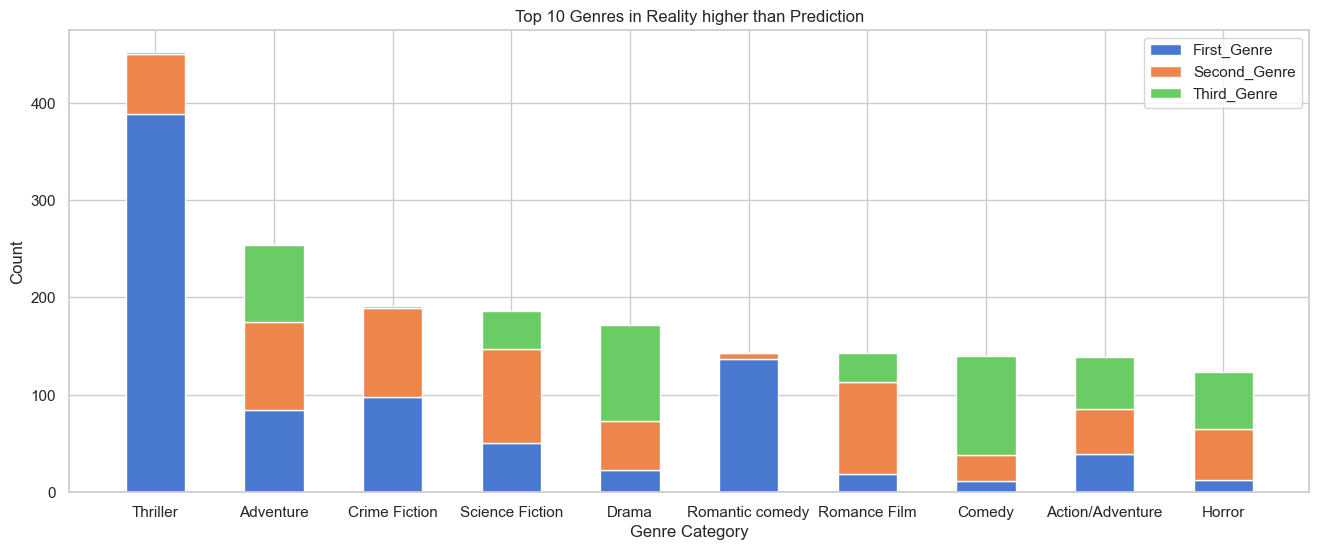

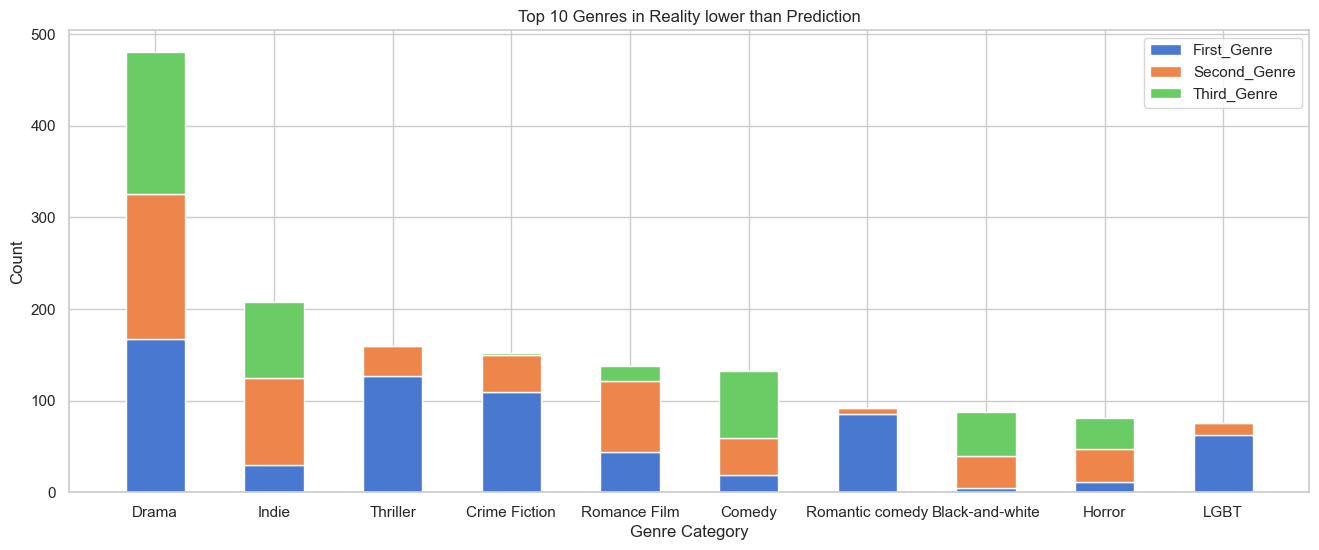

In [142]:
categories_h = All_t10_h.index
subcategories_h = ['First_Genre', 'Second_Genre', 'Third_Genre']
categories_l = All_t10_l.index
subcategories_l = ['First_Genre', 'Second_Genre', 'Third_Genre']
# Set bar width and index offset
bar_width = 0.5
index_h = np.arange(len(categories_h))

# Set figure size
plt.figure(figsize=(16, 6))

# Plot data for each subcategory in a stacked bar chart
for i in range(len(subcategories_h)):
    plt.bar(index_h, data_h[:, i], bar_width, label=subcategories_h[i], bottom=np.sum(data_h[:, :i], axis=1))

# Add labels and title
plt.xlabel('Genre Category')
plt.ylabel('Count')
plt.title('Top 10 Genres in Reality higher than Prediction')
plt.xticks(index_h, categories_h)
plt.legend()

# Display the plot
plt.show()

index_l = np.arange(len(categories_l))

# Set figure size
plt.figure(figsize=(16, 6))

# Plot data for each subcategory in a stacked bar chart
for i in range(len(subcategories_l)):
    plt.bar(index_l, data_l[:, i], bar_width, label=subcategories_l[i], bottom=np.sum(data_l[:, :i], axis=1))

# Add labels and title
plt.xlabel('Genre Category')
plt.ylabel('Count')
plt.title('Top 10 Genres in Reality lower than Prediction')
plt.xticks(index_l, categories_l)
plt.legend()

# Display the plot
plt.show()

In [143]:
categories = list(All_t10_h.index)
values = np.concatenate([data_h[:, 0], data_h[:, 1], data_h[:, 2]])

# Ensure all arrays have the same length
data_dict = {
    'Category': np.tile(categories, 3),  # Repeat categories 3 times
    'Subcategory': ['First_Genre'] * len(categories) + ['Second_Genre'] * len(categories) + ['Third_Genre'] * len(categories),
    'Value': values
}
df = pd.DataFrame(data_dict)

# Custom color mapping
color_map = {
    'First_t10': '#800080',   # Purple
    'Second_t10': '#00008B',  # Dark blue
    'Third_t10': '#87CEFA'    # Light blue
}

# Create stacked bar chart
bars = hv.Bars(df, ['Category', 'Subcategory'], 'Value')

# Set chart style
bars.opts(
    stacked=True,                      
    width=1000, height=500,            
    color=hv.Cycle(values=[color_map['First_t10'], color_map['Second_t10'], color_map['Third_t10']]), 
    title='Top 10 Genres in Reality higher than Prediction',
    tools=['hover'],                  
    toolbar='above',                   
    legend_position='top',             
    xrotation=45,                      
    padding=0.1                        
)

bars


:Bars   [Category,Subcategory]   (Value)

In [144]:
categories = list(All_t10_l.index)
values = np.concatenate([data_l[:, 0], data_l[:, 1], data_l[:, 2]])

# Ensure all arrays have the same length
data_dict = {
    'Category': np.tile(categories, 3),  # Repeat categories 3 times
    'Subcategory': ['First_Genre'] * len(categories) + ['Second_Genre'] * len(categories) + ['Third_Genre'] * len(categories),
    'Value': values
}
df = pd.DataFrame(data_dict)

# Custom color mapping
color_map = {
    'First_t10': '#800080',   # Purple
    'Second_t10': '#00008B',  # Dark blue
    'Third_t10': '#87CEFA'    # Light blue
}

# Create stacked bar chart
bars = hv.Bars(df, ['Category', 'Subcategory'], 'Value')

# Set chart style
bars.opts(
    stacked=True,                      
    width=1000, height=500,            
    color=hv.Cycle(values=[color_map['First_t10'], color_map['Second_t10'], color_map['Third_t10']]), 
    title='Top 10 Genres in Reality lower than Prediction',
    tools=['hover'],                  
    toolbar='above',                   
    legend_position='top',             
    xrotation=45,                      
    padding=0.1                        
)

bars


:Bars   [Category,Subcategory]   (Value)

In [25]:
# x=cleaned_data['averageRating']
# x = (x -x.mean())/x.std()
# y=cleaned_data['Log_Revenue']
# y = (y -y.mean())/y.std()
# plt.hist(cleaned_data['averageRating'])
# up=cleaned_data['averageRating'].mean() + cleaned_data['averageRating'].std()
# low=cleaned_data['averageRating'].mean() - cleaned_data['averageRating'].std()
# plt.hist(cleaned_data['averageRating'])
# # Create an array of y values
# y = np.linspace(-10, 3000, 400)

# # Plot the vertical line x = 1
# plt.plot(up*np.ones_like(y), y, label="x = 1", color='red')
# plt.plot(low*np.ones_like(y), y, label="x = 1", color='red')
# cleaned_data['averageRating'][(cleaned_data['averageRating'] < up) & (cleaned_data['averageRating'] > low)].count()
# cleaned_data['averageRating']

In [26]:
# from sklearn.cluster import KMeans
# x=cleaned_data['averageRating']
# x = (x -x.mean())/x.std()
# y=cleaned_data['Log_Revenue']
# y = (y -y.mean())/y.std()
# cleaned_data['averageRating'] = (x - np.min(x)) / (np.max(x) - np.min(x))
# cleaned_data['Log_Revenue'] = (y - np.min(y)) / (np.max(y) - np.min(y))
# data = np.column_stack((x, y))
# #elbow
# sse = []
# k_range = range(1, 11)  
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data)
#     sse.append(kmeans.inertia_)  
# plt.plot(k_range, sse, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('SSE (Inertia)')
# plt.show()

In [27]:
# kmeans = KMeans(n_clusters=4, random_state=42)  
# cleaned_data['cluster'] = kmeans.fit_predict(data)  
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='averageRating', y='Log_Revenue', hue='cluster', palette='Set1', data=cleaned_data, s=100, edgecolor='black', marker='o')
# plt.title('K-means Clustering of 2D Data')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend(title='Cluster')
# plt.show()